# Project: Wrangle And Analyze WeRateDogs Twitter Data

In [2]:
import json
import numpy as np
import pandas as pd
import requests
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline

# Gather 

### Twitter Archive

In [11]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.set_index('tweet_id', inplace = True)
twitter_archive.head()


,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Image Predictions

In [3]:
# Get image predictions form URL

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
respnse = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(respnse.content)

image_preds = pd.read_csv('image-predictions.tsv', sep='\t')
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Tweet Information Using Tweepy 

In [4]:
# Set up Tweepy api

consumer_key = '#'
consumer_secret = '#'
access_token = '#'
access_token_secret = '#'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
# Get json of each tweet and store in tweet_json

with open('tweet_json.txt', 'w') as file:
    for id in twitter_archive.index:
        try:
            tweet = api.get_status(id)
            json.dump(tweet, file)
            file.write('\n')
        except tweepy.TweepError as e:
            print('Error on tweet with id: {}'.format(id))

Error on tweet with id: 888202515573088257
Error on tweet with id: 873697596434513921
Error on tweet with id: 872668790621863937
Error on tweet with id: 872261713294495745
Error on tweet with id: 869988702071779329
Error on tweet with id: 866816280283807744
Error on tweet with id: 861769973181624320
Error on tweet with id: 856602993587888130
Error on tweet with id: 851953902622658560
Error on tweet with id: 845459076796616705
Error on tweet with id: 844704788403113984
Error on tweet with id: 842892208864923648
Error on tweet with id: 837366284874571778
Error on tweet with id: 837012587749474308
Error on tweet with id: 829374341691346946
Error on tweet with id: 827228250799742977
Error on tweet with id: 812747805718642688
Error on tweet with id: 802247111496568832
Error on tweet with id: 779123168116150273
Error on tweet with id: 775096608509886464
Error on tweet with id: 771004394259247104
Error on tweet with id: 770743923962707968
Error on tweet with id: 766008592277377025
Error on tw

Rate limit reached. Sleeping for: 238


Error on tweet with id: 758355060040593408
Error on tweet with id: 754011816964026368
Error on tweet with id: 680055455951884288


Rate limit reached. Sleeping for: 286


- Error with these tweets may be due to them being deleted.

In [8]:
# Read tweet_json and store it in a list 
tweets = []
with open('tweet_json.txt') as file:
    try:
        for line in file:

            tweet_json = json.loads(line)
            tweets.append({
                'tweet_id': tweet_json['id'],
                'retweet_count': tweet_json['retweet_count'],
                'favorite_count': tweet_json['favorite_count']
            })
    except Exception as e:
        print(e)

In [9]:
# Transform tweets to pandas dataframe 
df_tweets = pd.DataFrame(tweets, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_tweets.set_index('tweet_id', inplace = True)

# Assess

In [16]:
twitter_archive

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [25]:
twitter_archive.shape

(2356, 16)

In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 892420643555336193 to 666020888022790149
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   in_reply_to_status_id       78 non-null     float64
 1   in_reply_to_user_id         78 non-null     float64
 2   timestamp                   2356 non-null   object 
 3   source                      2356 non-null   object 
 4   text                        2356 non-null   object 
 5   retweeted_status_id         181 non-null    float64
 6   retweeted_status_user_id    181 non-null    float64
 7   retweeted_status_timestamp  181 non-null    object 
 8   expanded_urls               2297 non-null   object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  fl

In [19]:
twitter_archive.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [20]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
            ... 
Noosh          1
Jerome         1
Grizzwald      1
Huck           1
Socks          1
Name: name, Length: 957, dtype: int64

In [27]:
image_preds

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [28]:
image_preds.shape

(2075, 12)

In [29]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
df_tweets

,retweet_count,favorite_count
tweet_id,,
892420643555336193,7718,36246
892177421306343426,5704,31270
891815181378084864,3781,23543
891689557279858688,7878,39545
891327558926688256,8489,37768
...,...,...
666049248165822465,39,96
666044226329800704,132,272
666033412701032449,41,112


In [34]:
df_tweets.shape

(2327, 2)

In [35]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 892420643555336193 to 666020888022790149
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   retweet_count   2327 non-null   int64
 1   favorite_count  2327 non-null   int64
dtypes: int64(2)
memory usage: 54.5 KB


In [36]:
df_tweets.describe()

,retweet_count,favorite_count
count,2327.000000,2327.000000
mean,2709.802750,7576.165449
std,4581.322844,11760.032512
min,1.000000,0.000000
25%,548.000000,1318.000000
50%,1272.000000,3288.000000
75%,3157.000000,9275.500000
max,77911.000000,156384.000000


## Quality
### twitter_archive
- Some tweets have rating denominator != 10
- Some tweets have rating numerator < 10
- Some tweets have rating numerator that are outliers.
- Missing some expanded URLs.
- Some dogs have incorrect names.
- Reply and Retweet columns are not needed.

### image_prdes
- Missing rows (2075) instead of (2356).
- Inconsistency with naming of dog breed.
- Remove entries that have p1_dag as false.
- Remove columns(p2, p3, p2_dog, p3_dog, p2_conf, p3_conf) as we will only be using the p1 related columns. 

### df_tweets
- Missing rows (2327) instead of (2356).


## Tideness
- All three datasets should be joined.
### twitter_archive
- Merge dog stages(doggo, floofer, pupper, puppo) into one column.



# Clean

In [123]:
# Get copies of the dataframes
twitter_archive_clean = twitter_archive.copy()
image_preds_clean = image_preds.copy()
df_tweets_clean = df_tweets.copy()

## 1) twitter_archive

- The first act that we are going to take is that we extract the correct rating from the text of tweet to avoid unwanted mistakes.

In [124]:
twitter_archive_clean.rating_numerator =twitter_archive_clean.text.str.extract(r'([0-9]+[0-9.]*/10*)',expand=False).str.split('/').str[0].astype(float)
twitter_archive_clean.rating_numerator.value_counts()

12.00      558
11.00      465
10.00      461
13.00      353
9.00       159
8.00       102
7.00        55
14.00       54
5.00        35
6.00        32
3.00        19
4.00        15
2.00         9
1.00         8
420.00       2
0.00         2
15.00        2
9.75         2
144.00       1
1776.00      1
182.00       1
165.00       1
13.50        1
17.00        1
204.00       1
666.00       1
11.27        1
11.26        1
121.00       1
20.00        1
9.50         1
143.00       1
Name: rating_numerator, dtype: int64

### Some tweets have rating denominator != 10

**Define**

Tweets that have a rating denominator other than 10 should removed, since in the contxt of this twitter account all ratings are out of 10.

**Code**

In [125]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_denominator != 10].index, inplace = True)

**Test**

In [126]:
twitter_archive_clean.rating_denominator.value_counts()

10    2333
Name: rating_denominator, dtype: int64

### Some tweets have rating numerator < 10

**Define**

Tweets that have a rating numerator less than 10 should be removed, since in the context of this twitter account all ratings are 10 and higher.
 

**Code**

In [127]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator < 10].index, inplace = True)

**Test**

In [128]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      558
11.00      463
10.00      461
13.00      351
14.00       54
420.00       2
15.00        2
666.00       1
1776.00      1
182.00       1
11.27        1
11.26        1
17.00        1
13.50        1
Name: rating_numerator, dtype: int64

### Some tweets have rating numerator that are outliers.

**Define**

Some tweets have rating numerator values that are much greater than 10, they might have a negative effect on our analysis. We should drop rows that have rating numerator values > 30. 

**Code**

In [129]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.rating_numerator > 30].index, inplace = True)

**Test**

In [130]:
twitter_archive_clean.rating_numerator.value_counts()

12.00    558
11.00    463
10.00    461
13.00    351
14.00     54
15.00      2
11.27      1
11.26      1
17.00      1
13.50      1
Name: rating_numerator, dtype: int64

### Missing some expanded URLs.

**Define**

Some tweets are missing thier URLs, we can get them using the id.
 

**Code**

In [131]:
# View the current rows which do not have expanded_urls 
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,
886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12.0,10,None,None,None,None,None
881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17.0,10,None,None,None,None,None
879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14.0,10,None,None,None,None,None
870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10.0,10,None,None,None,None,None
863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12.0,10,None,None,None,None,None
857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12.0,10,None,None,None,None,None
856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14.0,10,None,None,None,None,None
856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14.0,10,None,None,None,None,None
850333567704068097,8.503288e+17,2.195506e+07,2017-04-07 13:04:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus MARK THAT DOG HAS SEEN AND EXPERIE...,NaN,NaN,NaN,NaN,13.0,10,None,None,None,None,None


In [132]:
tweet_url = 'https://twitter.com/dog_rates/status/'
def fill_urls(row):
    if pd.isna(row['expanded_urls']) :
        row['expanded_urls']  = tweet_url + str(row.name)
    return row

twitter_archive_clean = twitter_archive_clean.apply(fill_urls, axis=1)

**Test**

In [133]:
twitter_archive_clean[twitter_archive_clean['expanded_urls'].isnull()]

,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
tweet_id,,,,,,,,,,,,,,,,


In [134]:
twitter_archive_clean.loc[886267009285017600].expanded_urls

'https://twitter.com/dog_rates/status/886267009285017600'

### Some dogs have incorrect names.

**Define**

Some of the names of the dogs are incorrect for example the most commn name we have is 'a', which obviously isn't a name. 
remove rows which have name as 'a'.

**Code**

In [135]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.name == 'a'].index, inplace = True)

**Test**

In [136]:
twitter_archive_clean.name.value_counts()

None           584
Charlie         12
Oliver          10
Lucy            10
Cooper          10
              ... 
Shikha           1
Jersey           1
infuriating      1
Schnozz          1
his              1
Name: name, Length: 813, dtype: int64

### Reply and Retweet columns are not needed.

**Define**

Reply and Retweet columns are not needed for our analysis. Drop columns. 

**Code**

In [137]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

**Test**

In [138]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 892420643555336193 to 666063827256086533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1864 non-null   object 
 1   source              1864 non-null   object 
 2   text                1864 non-null   object 
 3   expanded_urls       1864 non-null   object 
 4   rating_numerator    1864 non-null   float64
 5   rating_denominator  1864 non-null   int64  
 6   name                1864 non-null   object 
 7   doggo               1864 non-null   object 
 8   floofer             1864 non-null   object 
 9   pupper              1864 non-null   object 
 10  puppo               1864 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 174.8+ KB


### Merge dog stages(doggo, floofer, pupper, puppo) into one column.

**Define**

We should create a dog_stage column which stores weither a dog is (doggo, floofer, pupper, puppo) and remove theses columns as well.

**Code**

In [143]:
twitter_archive_clean['dog_stage'] = 'none'
def extract_dog_stage(row):
    if row['doggo'] == 'doggo':
        row['dog_stage'] = 'doggo'
    elif row['floofer'] == 'floofer':
        row['dog_stage'] == 'floofer'
    elif row['pupper'] == 'pupper':
        row['dog_stage'] == 'pupper'
    elif row['puppo'] == 'puppo':
        row['dog_stage'] == 'puppo'
    else:
        row['dog_stage'] == 'none'
    return row
twitter_archive_clean = twitter_archive_clean.apply(extract_dog_stage, axis=1)
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

**Test**

In [144]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1864 entries, 892420643555336193 to 666063827256086533
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1864 non-null   object 
 1   source              1864 non-null   object 
 2   text                1864 non-null   object 
 3   expanded_urls       1864 non-null   object 
 4   rating_numerator    1864 non-null   float64
 5   rating_denominator  1864 non-null   int64  
 6   name                1864 non-null   object 
 7   dog_stage           1864 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 131.1+ KB


## 2) Image_preds
### Missing rows (2075) instead of (2356).
**Define**

We have missing tweets in our data.
remove tweets that are only present in twitter_archive or only in image_preds, so that we have equal number of tweets.

We should join the dataframes.

**Code**

In [146]:
image_preds_clean.set_index('tweet_id', inplace = True)

In [147]:
df_tweet_images = twitter_archive_clean.join(image_preds_clean, how='inner')

**Test**

In [148]:
df_tweet_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 892420643555336193 to 666063827256086533
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1615 non-null   object 
 1   source              1615 non-null   object 
 2   text                1615 non-null   object 
 3   expanded_urls       1615 non-null   object 
 4   rating_numerator    1615 non-null   float64
 5   rating_denominator  1615 non-null   int64  
 6   name                1615 non-null   object 
 7   dog_stage           1615 non-null   object 
 8   jpg_url             1615 non-null   object 
 9   img_num             1615 non-null   int64  
 10  p1                  1615 non-null   object 
 11  p1_conf             1615 non-null   float64
 12  p1_dog              1615 non-null   bool   
 13  p2                  1615 non-null   object 
 14  p2_conf             1615 non-null   float64
 15  p2_dog              1615

### Remove columns(p2, p3, p2_dog, p3_dog, p2_conf, p3_conf) as we will only be using the p1 related columns.
**Define**

We should keep columns related to p1 which represent the most confident prediction. Drop the other columns from the joind dataframe.

**Code**

In [149]:
df_tweet_images.drop(['p2','p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog'], axis=1, inplace=True)

**Test**

In [150]:
df_tweet_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1615 entries, 892420643555336193 to 666063827256086533
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1615 non-null   object 
 1   source              1615 non-null   object 
 2   text                1615 non-null   object 
 3   expanded_urls       1615 non-null   object 
 4   rating_numerator    1615 non-null   float64
 5   rating_denominator  1615 non-null   int64  
 6   name                1615 non-null   object 
 7   dog_stage           1615 non-null   object 
 8   jpg_url             1615 non-null   object 
 9   img_num             1615 non-null   int64  
 10  p1                  1615 non-null   object 
 11  p1_conf             1615 non-null   float64
 12  p1_dog              1615 non-null   bool   
dtypes: bool(1), float64(2), int64(2), object(8)
memory usage: 165.6+ KB


### Inconsistency with naming of dog breed.
**Define**

Some names start with an upper case letter and others don not. All name s should be lower case.

edit the joined dataframe.

**Code**

In [151]:
def to_lower(row):
    row['name'] = row['name'].lower()
    return row
df_tweet_images = df_tweet_images.apply(to_lower, axis=1)

**Test**

In [152]:
df_tweet_images.name.value_counts()

none        441
charlie      11
lucy         10
oliver        9
cooper        9
           ... 
brooks        1
dido          1
dobby         1
timison       1
reginald      1
Name: name, Length: 790, dtype: int64

### Remove entries that have p1_dag as false.
**Define**

Drop rows which have p1_dag as false, then drop the column. 
edit the joined dataframe.

**Code**

In [153]:
df_tweet_images.drop(df_tweet_images[df_tweet_images.p1_dog == False].index, inplace=True)
df_tweet_images.drop(['p1_dog'], axis=1, inplace=True)

In [154]:
df_tweet_images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 892177421306343426 to 666063827256086533
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1273 non-null   object 
 1   source              1273 non-null   object 
 2   text                1273 non-null   object 
 3   expanded_urls       1273 non-null   object 
 4   rating_numerator    1273 non-null   float64
 5   rating_denominator  1273 non-null   int64  
 6   name                1273 non-null   object 
 7   dog_stage           1273 non-null   object 
 8   jpg_url             1273 non-null   object 
 9   img_num             1273 non-null   int64  
 10  p1                  1273 non-null   object 
 11  p1_conf             1273 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 129.3+ KB


## 3) df_tweets
### Missing rows (2327) instead of (2356).
**Define**

We have missing tweets in our data. remove tweets that are only present in df_tweet_images or only in df_tweets, so that we have equal number of tweets.

We should join the dataframes.

**Code**

In [155]:
df_twitter_archive_master = df_tweet_images.join(df_tweets, how='inner')

**Test**

In [156]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1257 entries, 892177421306343426 to 666063827256086533
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           1257 non-null   object 
 1   source              1257 non-null   object 
 2   text                1257 non-null   object 
 3   expanded_urls       1257 non-null   object 
 4   rating_numerator    1257 non-null   float64
 5   rating_denominator  1257 non-null   int64  
 6   name                1257 non-null   object 
 7   dog_stage           1257 non-null   object 
 8   jpg_url             1257 non-null   object 
 9   img_num             1257 non-null   int64  
 10  p1                  1257 non-null   object 
 11  p1_conf             1257 non-null   float64
 12  retweet_count       1257 non-null   int64  
 13  favorite_count      1257 non-null   int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 147.3+ KB


## Now that we have a clean dataframe we should save it in file

In [157]:
df_twitter_archive_master.to_csv('twitter_archive_master.csv')

# Analysis

In [158]:
# Read dataframe from twitter_archive_master.csv
df = pd.read_csv('twitter_archive_master.csv')

## Question 1: What are most common dog names? 

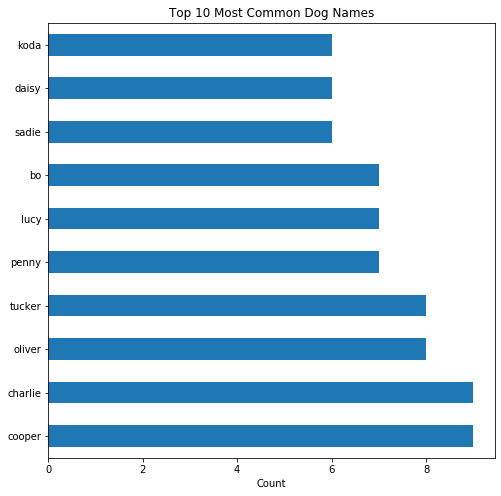

In [159]:
# Most common names for dogs 
dog_names = df.query('name != "none"')
plt.figure(figsize=(8,8))
plt.title('Top 10 Most Common Dog Names');
plt.xlabel('Count')

dog_names.name.value_counts()[:10].plot(kind='barh');

- In our dataset (cooper, charile) appear to be the two most commn names.

## Question 2: What are the most common dog breeds?

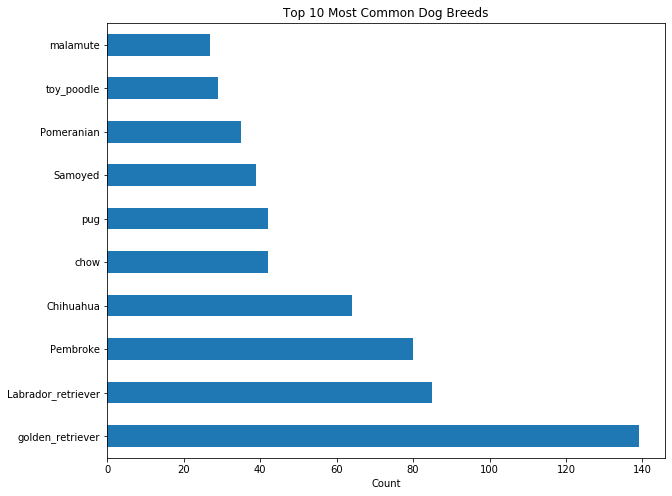

In [160]:
# Most common breeds of dogs
plt.figure(figsize=(10,8))
plt.title('Top 10 Most Common Dog Breeds');
plt.xlabel('Count')
df.p1.value_counts()[:10].plot(kind='barh');

- In our dataset the golden retriever appear to be the most common breed by a significant difference.
- The least common breed is the cocker spaniel

## Question 3: Does Rating numerator has an effect of retweet count?

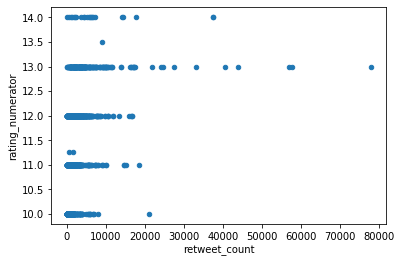

In [161]:
df.plot.scatter(x='retweet_count', y='rating_numerator');

- Rating numerator doesn't seem to have an effect on retweet count.

## Question 4: Does Rating numerator has an effect of favorite count?

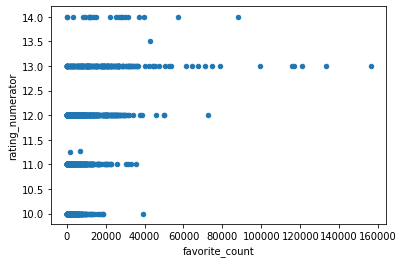

In [162]:
df.plot.scatter(x='favorite_count', y='rating_numerator');

- Rating numerator doesn't seem to have an effect on favorite count. 